In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet 

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor, ExtraTreesRegressor 
# Support vector regressor
from sklearn.svm import SVR 
from xgboost.sklearn import XGBRegressor

from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.utils import resample

from scipy import stats
from scipy.stats import zscore


In [79]:
import warnings 
warnings.filterwarnings("ignore")

In [80]:
plt.style.use('fivethirtyeight')

# %config InlineBackend.figure_format = ‘retina’

In [81]:
pd.set_option('display.max_columns', None) 

In [82]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [83]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [85]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [86]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [87]:
train['source'] = 'train'
test['source'] = 'test'

df = pd.concat([train, test], ignore_index=True)

In [88]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [89]:
df.shape 

(14204, 13)

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [91]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [92]:
len(df.select_dtypes([np.number]).columns)

5

In [93]:
numeric_cols = df.select_dtypes([np.number]).columns

In [94]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

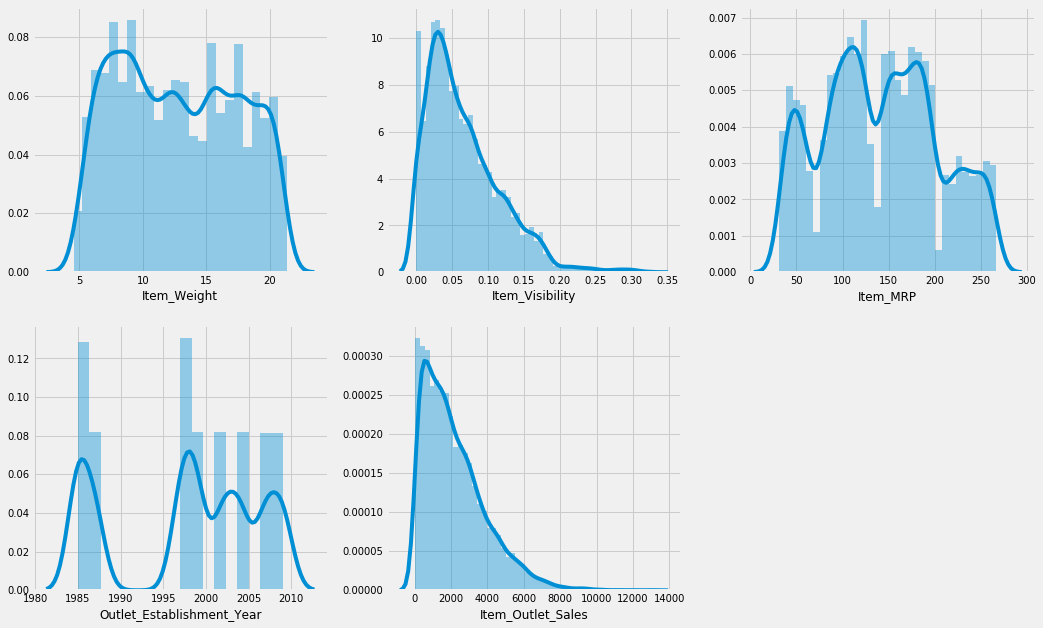

In [95]:
fig_dist, ax_dist = plt.subplots(2, 3, figsize=(16,10))
sns.distplot(df[numeric_cols[0]], ax=ax_dist[0][0])
sns.distplot(df[numeric_cols[1]], ax=ax_dist[0][1])
sns.distplot(df[numeric_cols[2]], ax=ax_dist[0][2])
sns.distplot(df[numeric_cols[3]], ax=ax_dist[1][0])
sns.distplot(df[numeric_cols[4]], ax=ax_dist[1][1])
fig_dist.delaxes(ax_dist[1][2])

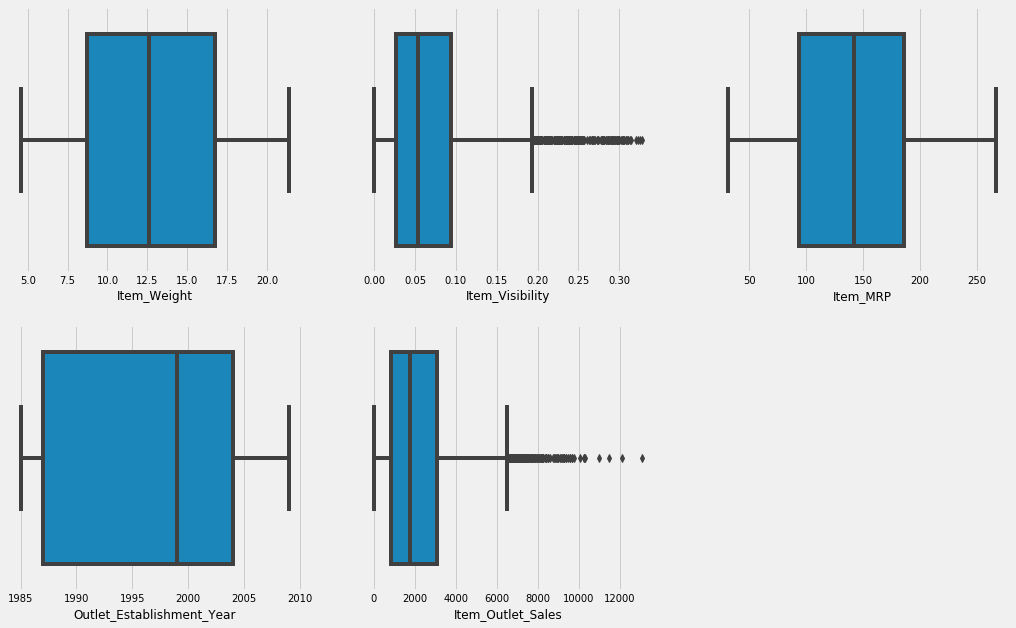

In [96]:
fig_box, ax_box = plt.subplots(2, 3, figsize=(16,10))
sns.boxplot(df[numeric_cols[0]].dropna(), ax=ax_box[0][0])
sns.boxplot(df[numeric_cols[1]].dropna(), ax=ax_box[0][1])
sns.boxplot(df[numeric_cols[2]].dropna(), ax=ax_box[0][2])
sns.boxplot(df[numeric_cols[3]].dropna(), ax=ax_box[1][0])
sns.boxplot(df[numeric_cols[4]].dropna(), ax=ax_box[1][1])
fig_box.delaxes(ax_box[1][2])

<Figure size 1152x1152 with 0 Axes>

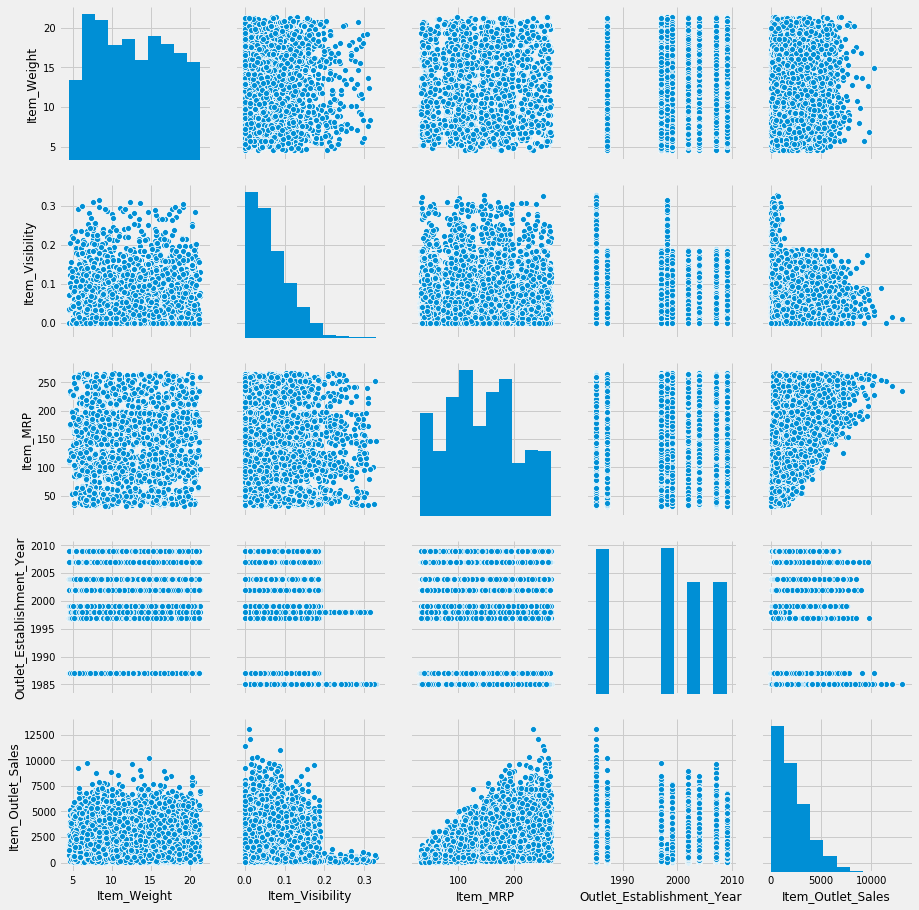

In [97]:
plt.figure(figsize=(16,16))
sns.pairplot(df)

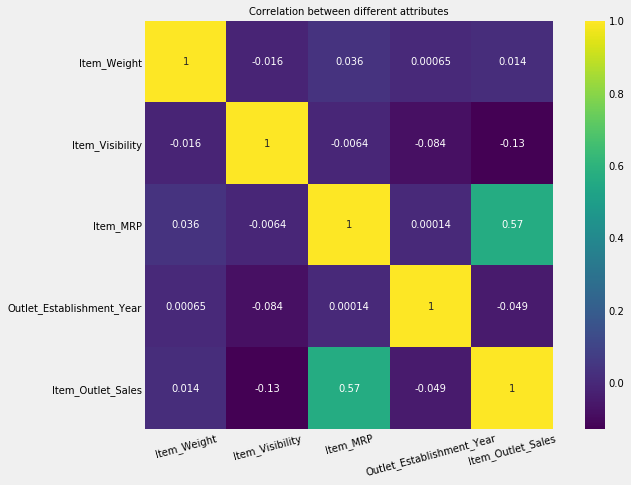

In [98]:
plt.figure(figsize=(10,7))
plt.rc('xtick', labelsize=SMALL_SIZE)   
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.xticks(rotation=15)
plt.show()

In [122]:
non_numeric_cols = df.select_dtypes([np.object]).columns

In [123]:
non_numeric_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

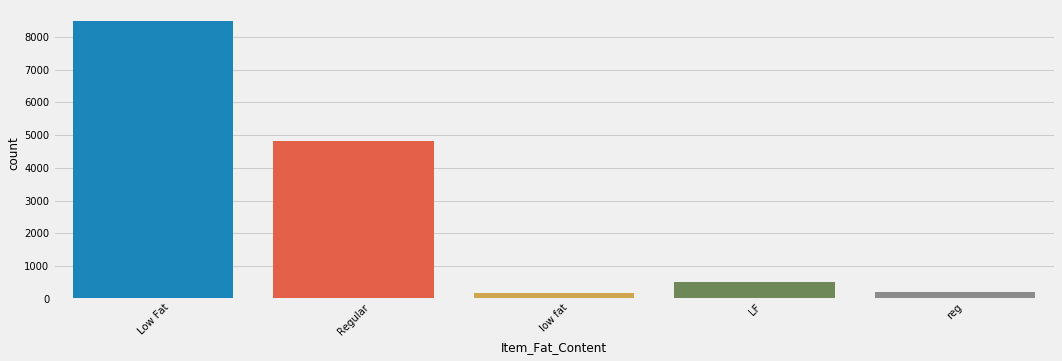

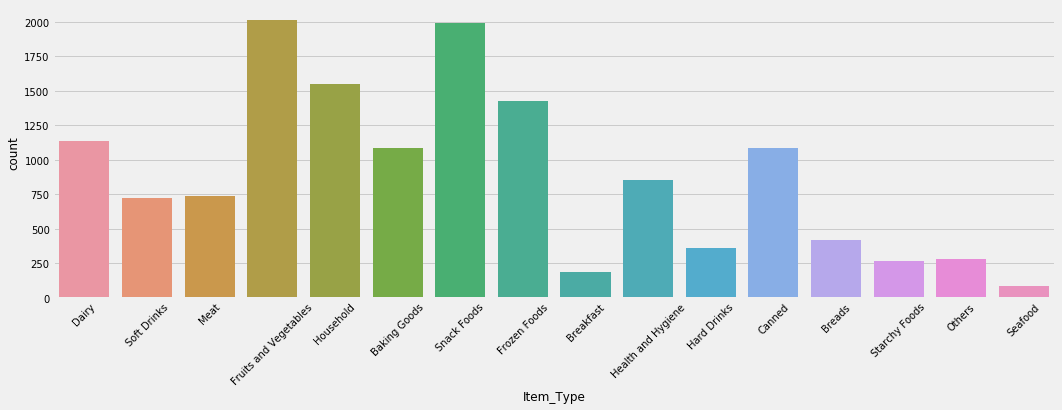

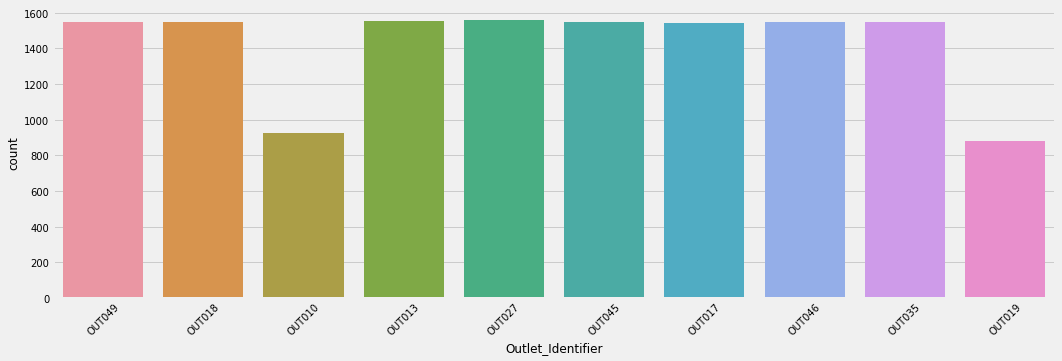

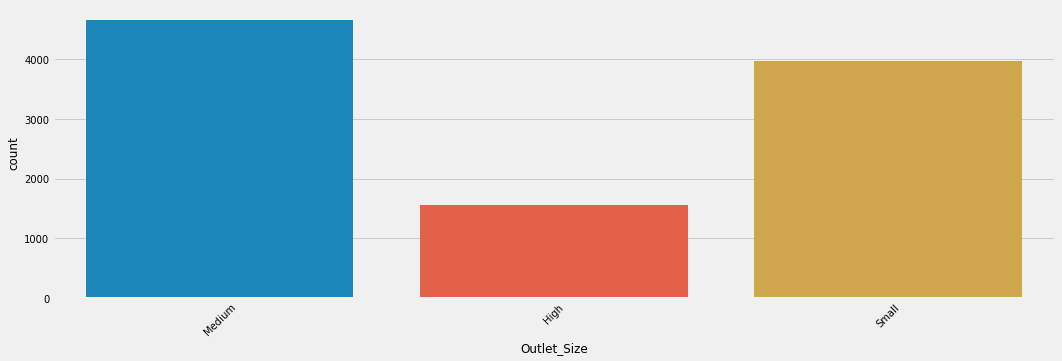

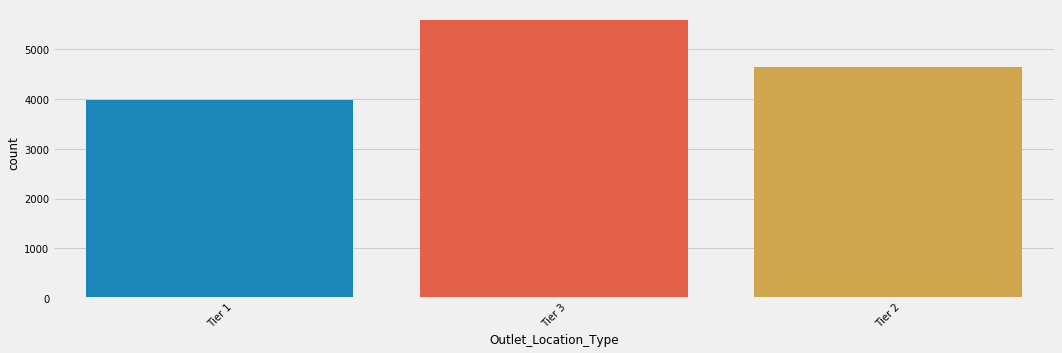

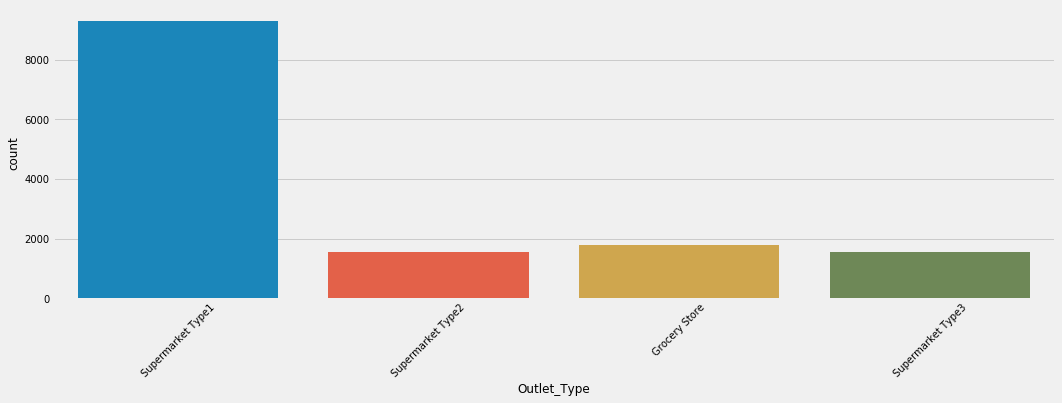

In [135]:
for col in non_numeric_cols[1:-1]:  
    plt.figure(figsize=(16, 5))
    sns.countplot(df[col])
    plt.xticks(rotation=45)

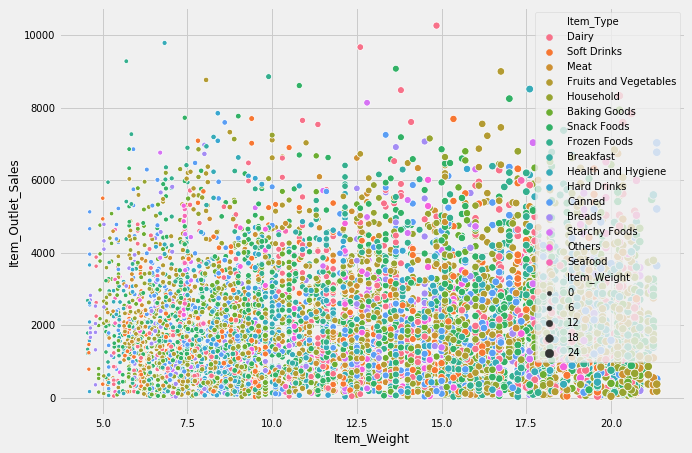

In [138]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_Weight',
    y='Item_Outlet_Sales',
    hue='Item_Type',
    style=None,
    size='Item_Weight',
    data=df,
    )

Text(0, 0.5, 'Outlet Sales')

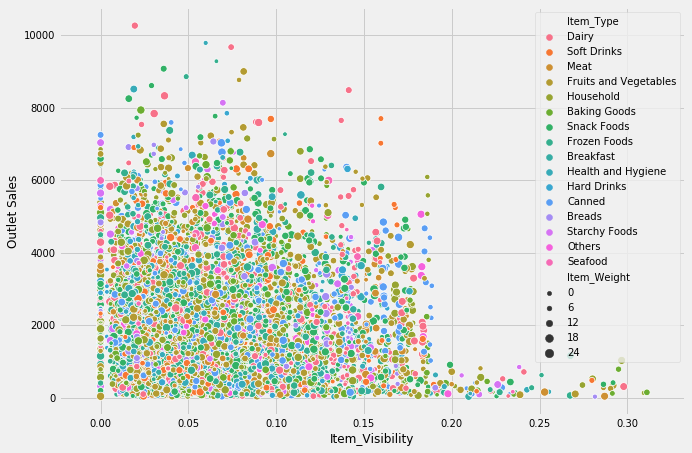

In [143]:
plt.figure(figsize=(10,7))

sns.scatterplot(x='Item_Visibility',
    y='Item_Outlet_Sales',
    hue='Item_Type',
    style=None,
    size='Item_Weight',
    data=df,
    )
plt.ylabel('Outlet Sales') # overriding the y axis label name

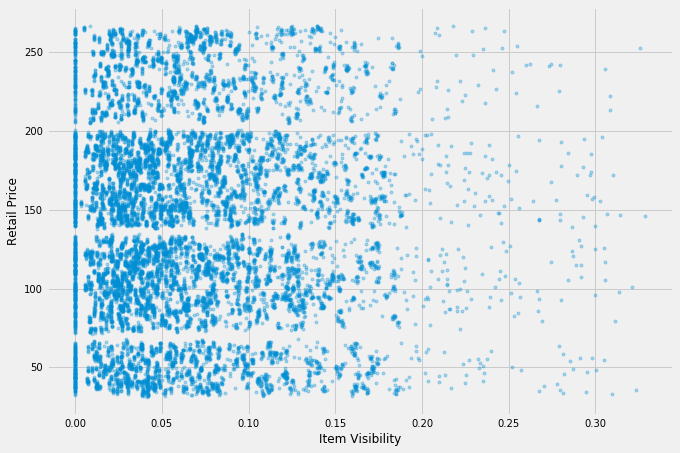

In [146]:
plt.figure(figsize=(10,7))
plt.xlabel('Item Visibility')
plt.ylabel('Retail Price')
plt.plot(df['Item_Visibility'], df['Item_MRP'], '.', alpha=0.3)